<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.2 : Networks using Blocks (VGG)

VGG : virtual geometry group

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [ ]:
from d2l import torch as d2l

In [ ]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def vgg_block(num_convs, out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
    layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

  return nn.Sequential(*layers)

In [ ]:
vgg_block(4, 7)

Sequential(
  (0): LazyConv2d(0, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): LazyConv2d(0, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): LazyConv2d(0, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): LazyConv2d(0, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [ ]:
from torchsummary import summary

In [ ]:
summary(vgg_block(4, 256), (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 224, 224]           2,560
              ReLU-2        [-1, 256, 224, 224]               0
            Conv2d-3        [-1, 256, 224, 224]         590,080
              ReLU-4        [-1, 256, 224, 224]               0
            Conv2d-5        [-1, 256, 224, 224]         590,080
              ReLU-6        [-1, 256, 224, 224]               0
            Conv2d-7        [-1, 256, 224, 224]         590,080
              ReLU-8        [-1, 256, 224, 224]               0
         MaxPool2d-9        [-1, 256, 112, 112]               0
Total params: 1,772,800
Trainable params: 1,772,800
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 808.50
Params size (MB): 6.76
Estimated Total Size (MB): 815.45
-----------------------------------

In [ ]:
class VGG(nn.Module):

  def __init__(self, arch, lr=0.01, num_classes=10):
    super().__init__()
    self.arch = arch
    self.lr = lr
    self.num_classes = num_classes
    conv_blks = []
    for (num_convs, out_channels) in arch:
      conv_blks.append(vgg_block(num_convs, out_channels))
    
    self.net = nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(),
        nn.LazyLinear(4096), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )

  def forward(self, X):
    return self.net(X)

  def apply_init(self, train_loader):
    features, targets = next(iter(train_loader))
    t = self.net(features)
    for module in self.net:
      nn.init.xavier_uniform_(module.weight)

In [ ]:
summary??

In [ ]:
arch = [(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)]
vgg_11 = VGG(arch)
summary(vgg_11, (1, 224, 224), device='cpu')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]             640
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

In [ ]:
data = torchvision.datasets.FashionMNIST(root='./try',
                                         train=True,
                                         download=True,
                                         transform=transforms.Compose([
                                             transforms.Resize(224),
                                             transforms.ToTensor()
                                         ]))

In [ ]:
data[0][0].shape

torch.Size([1, 224, 224])

In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

In [ ]:
# Let's first prepare the data:
train_set = torchvision.datasets.FashionMNIST(root='./data',
                                              train=True,
                                              download=True,
                                              transform=transform)

test_set = torchvision.datasets.FashionMNIST(root='./data',
                                             train=False,
                                             download=False,
                                             transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           shuffle=True,
                                           batch_size=128)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          shuffle=False,
                                          batch_size=128)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
examples = next(iter(train_loader))
features, targets = examples
print(f'features.shape = {features.shape}')
print(f"targets.shape = {targets.shape}")

features.shape = torch.Size([128, 1, 224, 224])
targets.shape = torch.Size([128])


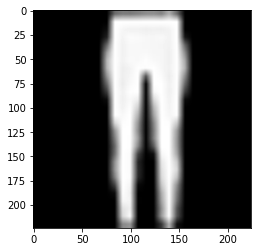

In [ ]:
plt.imshow(features[0][0], cmap='gray');

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
len(train_loader)

469

In [ ]:
for i in range(469):
  if (i) % (250) == 0:
    print(i)

0
250


In [ ]:
class Trainer():

  def __init__(self, num_epochs):
    self.num_epochs = num_epochs

  def fit(self, model, loader):

    optimizer = torch.optim.SGD(model.parameters(), model.lr)
    criterion = nn.CrossEntropyLoss()
    n_total_steps = len(loader)

    for epoch in range(self.num_epochs):
      for i, (features, targets) in enumerate(loader):

        features = features.to(device)
        targets = targets.to(device)

        outputs = model(features)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % (self.num_epochs/10) == 0:
          if (i+1) % (250) == 0:
            print(f"epoch : {epoch+1}/{self.num_epochs}, step : {i+1}/{n_total_steps}, loss : {loss.item():.4f}")

In [ ]:
def acc_model(model, loader):

  with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for features, targets in loader:
      features = features.to(device)
      targets = targets.to(device)

      outputs = model(features)
      _, preds = torch.max(outputs, 1)
      n_samples += targets.shape[0]
      n_correct += (preds == targets).sum().item()

  acc = 100 * n_correct / n_samples
  print(f"accuracy of model : {acc:.4f}")

In [ ]:
arch = [(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)]
vgg_11 = VGG(arch)
summary(vgg_11, (1, 224, 224), device='cpu')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]             640
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

In [ ]:
vgg_11 = vgg_11.to(device)
trainer = Trainer(num_epochs=20)
trainer.fit(vgg_11, train_loader)
acc_model(vgg_11, test_loader)

epoch : 2/20, step : 250/469, loss : 2.3021
epoch : 4/20, step : 250/469, loss : 2.3025


KeyboardInterrupt: ignored

In [ ]:
class VGG(d2l.Classifier):

  def __init__(self, arch, lr=0.01, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    conv_blks = []
    for (num_convs, out_channels) in arch:
      conv_blks.append(vgg_block(num_convs, out_channels))
    
    self.net = nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes)
    )
    self.net.apply(d2l.init_cnn)

  def forward(self, X):
    return self.net(X)

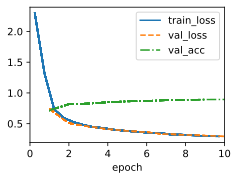

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(train=True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
class AlexNet(d2l.Classifier):

  def __init__(self, lr=0.01, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
        nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes) 
    )
    self.net.apply(d2l.init_cnn)

  def forward(self, X):
    return self.net(X)

In [ ]:
from torchsummary import summary

In [ ]:
summary(AlexNet(), (1, 224, 224), device='cpu')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 54, 54]          11,712
              ReLU-2           [-1, 96, 54, 54]               0
         MaxPool2d-3           [-1, 96, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]         614,656
              ReLU-5          [-1, 256, 26, 26]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         885,120
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 384, 12, 12]       1,327,488
             ReLU-10          [-1, 384, 12, 12]               0
           Conv2d-11          [-1, 384, 12, 12]       1,327,488
             ReLU-12          [-1, 384, 12, 12]               0
        MaxPool2d-13            [-1, 384, 5, 5]               0
          Flatten-14                 [-

VGG-11 has almost double parameters compared to alexnet

In [ ]:
arch = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg_16 = VGG(arch=arch, lr=0.01)
summary(vgg_16, (3, 224, 224), device='cpu')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
arch = ((2, 64), (2, 64), (4, 256), (4, 512), (4, 512))
vgg_19 = VGG(arch=arch, lr=0.01)
summary(vgg_19, (3, 224, 224), device='cpu')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6         [-1, 64, 112, 112]          36,928
              ReLU-7         [-1, 64, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          36,928
              ReLU-9         [-1, 64, 112, 112]               0
        MaxPool2d-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         147,712
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
class VGG1(d2l.Classifier):

  def __init__(self, num_classes=10, lr=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(64, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(64, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(512, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(512, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(512, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes)
    )
    self.net.apply(d2l.init_cnn)

  def forward(self, X):
    return self.net(X)

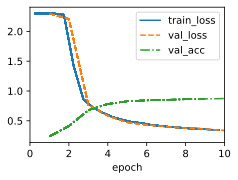

In [ ]:
model = VGG1()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28)) # let's try without upsampling
model.apply_init([next(iter(data.get_dataloader(train=True)))[0]], d2l.init_cnn)
trainer.fit(model, data)